In [23]:
import pandas as pd
import numpy as np

In [25]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [26]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)  # Generate 100 points from -2π to 2π
y = np.sin(x)  # Compute sin(x)


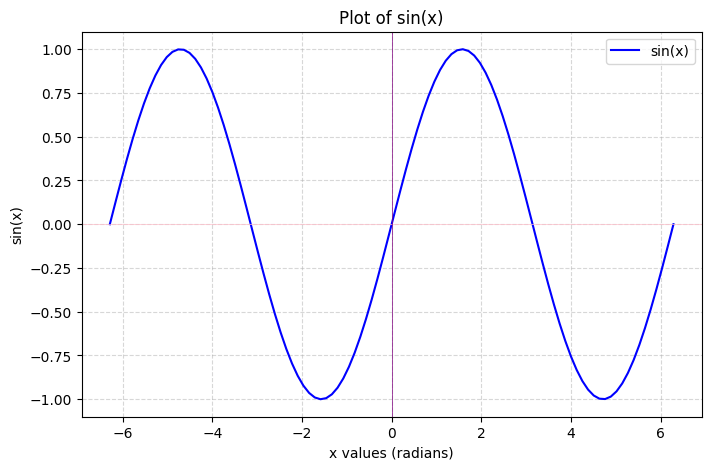

In [29]:
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(x, y, label="sin(x)", color="blue")  # Plot sin(x)
plt.axhline(0, color="pink", linewidth=0.5)  # Add horizontal axis
plt.axvline(0, color="purple", linewidth=0.5)  # Add vertical axis
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid lines
plt.legend()  # Show legend
plt.title("Plot of sin(x)")  # Set title
plt.xlabel("x values (radians)")  # Label x-axis
plt.ylabel("sin(x)")  # Label y-axis
plt.show()  # Display the plot


In [24]:
import random
import pandas as pd
import numpy as np
from typing import List, Dict, Tuple

class UltimatumGame:
    def __init__(self, total_amount: float = 100.0):
        """
        Initialize the Ultimatum Game simulation.

        Args:
            total_amount: The amount of money to be split between players
        """
        self.total_amount = total_amount
        self.results = []

    def simulate_rational_agent(self, offer: float) -> bool:
        """
        Simulate a purely rational agent that accepts any non-zero offer.

        Args:
            offer: The amount offered by the proposer

        Returns:
            bool: True if offer accepted, False if rejected
        """
        return offer > 0

    def simulate_fairness_agent(self, offer: float, fairness_threshold: float = 0.3) -> bool:
        """
        Simulate an agent that cares about fairness.

        Args:
            offer: The amount offered by the proposer
            fairness_threshold: Minimum acceptable proportion of total amount

        Returns:
            bool: True if offer accepted, False if rejected
        """
        offer_proportion = offer / self.total_amount
        return offer_proportion >= fairness_threshold

    def simulate_round(self, proposer_type: str = "random",
                      responder_type: str = "fairness") -> Dict:
        """
        Simulate one round of the Ultimatum Game.

        Args:
            proposer_type: Strategy for proposer ("random", "strategic")
            responder_type: Strategy for responder ("rational", "fairness")

        Returns:
            Dict containing round results
        """
        # Proposer makes offer
        if proposer_type == "random":
            offer = random.uniform(0, self.total_amount)
        else:  # strategic proposer
            offer = self.total_amount * 0.4  # offers 40% as a strategic choice

        # Responder decides
        if responder_type == "rational":
            accepted = self.simulate_rational_agent(offer)
        else:  # fairness-based responder
            accepted = self.simulate_fairness_agent(offer)

        # Record results
        result = {
            "offer": offer,
            "offer_percentage": (offer / self.total_amount) * 100,
            "accepted": accepted,
            "proposer_type": proposer_type,
            "responder_type": responder_type
        }

        self.results.append(result)
        return result

    def run_experiment(self, n_rounds: int = 100,
                      proposer_type: str = "random",
                      responder_type: str = "fairness") -> pd.DataFrame:
        """
        Run multiple rounds of the experiment.

        Args:
            n_rounds: Number of rounds to simulate
            proposer_type: Strategy for proposer
            responder_type: Strategy for responder

        Returns:
            DataFrame with experiment results
        """
        for _ in range(n_rounds):
            self.simulate_round(proposer_type, responder_type)

        return pd.DataFrame(self.results)

    def analyze_results(self) -> Dict:
        """
        Analyze the experimental results.

        Returns:
            Dict containing summary statistics
        """
        df = pd.DataFrame(self.results)

        analysis = {
            "total_rounds": len(df),
            "acceptance_rate": df["accepted"].mean() * 100,
            "average_offer": df["offer"].mean(),
            "average_offer_percentage": df["offer_percentage"].mean(),
            "min_offer": df["offer"].min(),
            "max_offer": df["offer"].max()
        }

        return analysis

# Example usage
if __name__ == "__main__":
    # Initialize game
    game = UltimatumGame(total_amount=100.0)

    # Run experiment with different agent types
    results_df = game.run_experiment(
        n_rounds=700,
        proposer_type="random",
        responder_type="fairness"
    )

    # Analyze results
    analysis = game.analyze_results()

    # Print summary
    print("\nExperiment Results:")
    print(f"Total rounds: {analysis['total_rounds']}")
    print(f"Acceptance rate: {analysis['acceptance_rate']:.1f}%")
    print(f"Average offer: ${analysis['average_offer']:.2f}")
    print(f"Average offer percentage: {analysis['average_offer_percentage']:.1f}%")
    print(f"Range of offers: ${analysis['min_offer']:.2f} - ${analysis['max_offer']:.2f}")


Experiment Results:
Total rounds: 700
Acceptance rate: 70.6%
Average offer: $51.76
Average offer percentage: 51.8%
Range of offers: $0.07 - $99.81


In [25]:
import random
from typing import List, Dict, Any
import pandas as pd
import numpy as np

class HomoSilicus:
    def __init__(self,
                 personality_traits: Dict[str, float] = None,
                 cognitive_biases: List[str] = None,
                 risk_preference: float = 0.5,
                 social_preferences: Dict[str, float] = None):
        """
        Initialize a synthetic human agent with configurable characteristics

        Args:
            personality_traits: Dict of personality dimensions (e.g., openness, conscientiousness)
            cognitive_biases: List of active cognitive biases
            risk_preference: Float between 0-1 indicating risk tolerance
            social_preferences: Dict of social preference parameters
        """
        # Default personality traits if none provided
        self.personality_traits = personality_traits or {
            "openness": random.uniform(0, 1),
            "conscientiousness": random.uniform(0, 1),
            "extraversion": random.uniform(0, 1),
            "agreeableness": random.uniform(0, 1),
            "neuroticism": random.uniform(0, 1)
        }

        # Default cognitive biases
        self.cognitive_biases = cognitive_biases or [
            "anchoring",
            "loss_aversion",
            "status_quo_bias",
            "confirmation_bias"
        ]

        self.risk_preference = risk_preference

        # Default social preferences
        self.social_preferences = social_preferences or {
            "altruism": random.uniform(0, 1),
            "reciprocity": random.uniform(0, 1),
            "inequality_aversion": random.uniform(0, 1),
            "trust": random.uniform(0, 1)
        }

        self.memory = []  # Store past experiences
        self.learning_rate = 0.1  # Rate at which agent updates beliefs

    def apply_cognitive_bias(self, decision_context: Dict[str, Any]) -> Dict[str, Any]:
        """
        Apply configured cognitive biases to modify decision context

        Args:
            decision_context: Dictionary containing decision parameters

        Returns:
            Modified decision context
        """
        modified_context = decision_context.copy()

        if "anchoring" in self.cognitive_biases and "anchor_value" in decision_context:
            # Adjust values toward anchor
            for key in decision_context:
                if isinstance(decision_context[key], (int, float)):
                    modified_context[key] = (
                        0.7 * decision_context[key] +
                        0.3 * decision_context["anchor_value"]
                    )

        if "loss_aversion" in self.cognitive_biases:
            # Weight losses more heavily than gains
            if "potential_loss" in decision_context:
                modified_context["potential_loss"] *= 2.5

        return modified_context

    def make_decision(self,
                     options: List[Dict[str, Any]],
                     context: Dict[str, Any] = None) -> Dict[str, Any]:
        """
        Make a decision among given options considering personality and biases

        Args:
            options: List of possible choices with their attributes
            context: Additional context about the decision

        Returns:
            Chosen option with decision metadata
        """
        context = context or {}
        modified_context = self.apply_cognitive_bias(context)

        # Calculate utility for each option
        utilities = []
        for option in options:
            utility = self._calculate_utility(option, modified_context)
            utilities.append(utility)

        # Probabilistic choice based on utilities
        probabilities = self._softmax(utilities)
        chosen_idx = np.random.choice(len(options), p=probabilities)

        decision = {
            "chosen_option": options[chosen_idx],
            "utility": utilities[chosen_idx],
            "context": modified_context,
            "personality_influence": self._personality_influence(options[chosen_idx])
        }

        self.memory.append(decision)
        return decision

    def _calculate_utility(self,
                         option: Dict[str, Any],
                         context: Dict[str, Any]) -> float:
        """
        Calculate utility of an option considering various factors
        """
        base_utility = option.get("value", 0)

        # Risk adjustment
        if "risk" in option:
            risk_factor = (1 - self.risk_preference) * option["risk"]
            base_utility -= risk_factor

        # Social preferences
        if "social_impact" in option:
            social_utility = (
                self.social_preferences["altruism"] * option["social_impact"] +
                self.social_preferences["inequality_aversion"] *
                (-abs(option.get("inequality", 0)))
            )
            base_utility += social_utility

        # Personality influence
        personality_factor = sum(
            trait_value * option.get(trait, 0)
            for trait, trait_value in self.personality_traits.items()
        )

        return base_utility + personality_factor

    def _softmax(self, utilities: List[float]) -> np.ndarray:
        """
        Convert utilities to probabilities using softmax function
        """
        exp_utils = np.exp(utilities - np.max(utilities))
        return exp_utils / exp_utils.sum()

    def _personality_influence(self, option: Dict[str, Any]) -> Dict[str, float]:
        """
        Calculate how personality traits influenced the decision
        """
        influences = {}
        for trait, value in self.personality_traits.items():
            if trait in option:
                influences[trait] = value * option[trait]
        return influences

    def update_beliefs(self,
                      outcome: Dict[str, Any],
                      decision: Dict[str, Any]) -> None:
        """
        Update agent's beliefs and preferences based on decision outcomes

        Args:
            outcome: Actual outcome of the decision
            decision: Original decision made
        """
        # Update risk preference based on outcome
        if "realized_value" in outcome and "expected_value" in decision["chosen_option"]:
            prediction_error = (
                outcome["realized_value"] -
                decision["chosen_option"]["expected_value"]
            )
            self.risk_preference += self.learning_rate * prediction_error
            self.risk_preference = max(0, min(1, self.risk_preference))

        # Update social preferences
        if "social_outcome" in outcome:
            for pref in self.social_preferences:
                if pref in outcome["social_outcome"]:
                    error = outcome["social_outcome"][pref] - self.social_preferences[pref]
                    self.social_preferences[pref] += self.learning_rate * error
                    self.social_preferences[pref] = max(0, min(1, self.social_preferences[pref]))

# Example usage
if __name__ == "__main__":
    # Create a synthetic human
    agent = HomoSilicus(
        personality_traits={
            "openness": 0.7,
            "conscientiousness": 0.6,
            "extraversion": 0.4,
            "agreeableness": 0.8,
            "neuroticism": 0.3
        },
        risk_preference=0.4
    )

    # Define some decision options
    investment_options = [
        {
            "name": "Conservative Fund",
            "value": 5,
            "risk": 0.2,
            "expected_value": 6,
            "social_impact": 0.3,
            "conscientiousness": 0.8
        },
        {
            "name": "Growth Fund",
            "value": 10,
            "risk": 0.5,
            "expected_value": 15,
            "social_impact": 0.1,
            "openness": 0.9
        }
    ]

    # Make and analyze a decision
    decision = agent.make_decision(
        options=investment_options,
        context={"market_condition": "stable", "anchor_value": 7}
    )

    print("\nDecision Analysis:")
    print(f"Chosen option: {decision['chosen_option']['name']}")
    print(f"Utility: {decision['utility']:.2f}")
    print("Personality influences:", decision['personality_influence'])


Decision Analysis:
Chosen option: Growth Fund
Utility: 10.38
Personality influences: {'openness': 0.63}
